In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [36]:
data=pd.read_csv('/content/sample_data/healthcare_dataset.csv')


In [37]:
data

,Name,Age,Gender,BloodType,MedicalCondition,DateofAdmission,Doctor,Hospital,Insurance Provider,BillingAmount,RoomNumber,Admission Type,Discharge Date,Medication,TestResults
0,Tiffany Ramirez,81,Female,O-,Diabetes,17-11-2022,Patrick Parker,Wallace-Hamilton,Medicare,37490.983360,146,Elective,01-12-2022,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,01-06-2023,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064850,404,Emergency,15-06-2023,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,09-01-2019,Paul Baker,Walton LLC,Medicare,36874.897000,292,Emergency,08-02-2019,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,02-05-2020,Brian Chandler,Garcia Ltd,Medicare,23303.322090,480,Urgent,03-05-2020,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,09-07-2021,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344180,477,Urgent,02-08-2021,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,29-07-2022,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840080,110,Elective,02-08-2022,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,06-01-2022,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,29-01-2022,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,01-07-2022,Robert Nicholson,Larson and Sons,Blue Cross,49559.202900,312,Elective,15-07-2022,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,06-02-2020,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344760,420,Urgent,26-02-2020,Penicillin,Normal


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   BloodType           10000 non-null  object 
 4   MedicalCondition    10000 non-null  object 
 5   DateofAdmission     10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   BillingAmount       10000 non-null  float64
 10  RoomNumber          10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  TestResults         10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [39]:
data.TestResults.value_counts()

Abnormal        3456
Inconclusive    3277
Normal          3267
Name: TestResults, dtype: int64

In [40]:
# Map 'unstable' to 1 and 'stable' to 0
data['TestResults'] = data['TestResults'].map({'Abnormal': 1, 'Inconclusive': 0, 'Normal': 2 })



# Convert the 'stabf' column to numeric
data['TestResults'] = pd.to_numeric(data['TestResults'], errors='coerce')

# Display the updated DataFrame
print(data.head())

                  Name  Age  Gender BloodType MedicalCondition  \
0      Tiffany Ramirez   81  Female        O-         Diabetes   
1          Ruben Burns   35    Male        O+           Asthma   
2            Chad Byrd   61    Male        B-          Obesity   
3    Antonio Frederick   49    Male        B-           Asthma   
4  Mrs. Brandy Flowers   51    Male        O-        Arthritis   

  DateofAdmission          Doctor                   Hospital  \
0      17-11-2022  Patrick Parker           Wallace-Hamilton   
1      01-06-2023   Diane Jackson  Burke, Griffin and Cooper   
2      09-01-2019      Paul Baker                 Walton LLC   
3      02-05-2020  Brian Chandler                 Garcia Ltd   
4      09-07-2021  Dustin Griffin    Jones, Brown and Murray   

  Insurance Provider  BillingAmount  RoomNumber Admission Type Discharge Date  \
0           Medicare    37490.98336         146       Elective     01-12-2022   
1   UnitedHealthcare    47304.06485         404      Eme

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   BloodType           10000 non-null  object 
 4   MedicalCondition    10000 non-null  object 
 5   DateofAdmission     10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   BillingAmount       10000 non-null  float64
 10  RoomNumber          10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  TestResults         10000 non-null  int64  
dtypes: float64(1), int64(3), object(11)
memory usage: 1.1+

In [42]:
# one-hot-encoding categorical columns
data= pd.get_dummies(data,columns=['Name','Gender', 'BloodType', 'MedicalCondition', 'DateofAdmission','Doctor','Hospital','Insurance Provider','Admission Type','Discharge Date','Medication'],prefix="",prefix_sep="")
print(data.shape)

(10000, 31115)


In [43]:
X = data.drop(['TestResults'], axis=1)
y = data['TestResults']

In [44]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [45]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

In [46]:

# instantiate the classifier

rfc = RandomForestClassifier(random_state=0)


In [47]:
# fit the model

rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [54]:
# Predict the Test set results

y_pred = rfc.predict(X_test)

In [55]:
accuracy_rfc =accuracy_score(y_test, y_pred)

In [56]:
from sklearn.metrics import accuracy_score

print('Model accuracy score of rfc: ',accuracy_rfc )

Model accuracy score of rfc:  0.33636363636363636


In [57]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm_rfc = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm_rfc)

Confusion matrix

 [[304 560 198]
 [344 584 235]
 [316 537 222]]


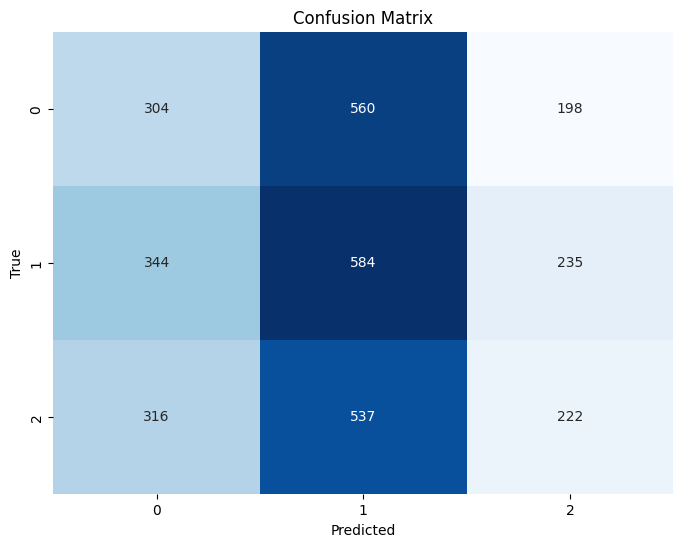

In [58]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.32      0.29      0.30      1062
           1       0.35      0.50      0.41      1163
           2       0.34      0.21      0.26      1075

    accuracy                           0.34      3300
   macro avg       0.33      0.33      0.32      3300
weighted avg       0.33      0.34      0.32      3300



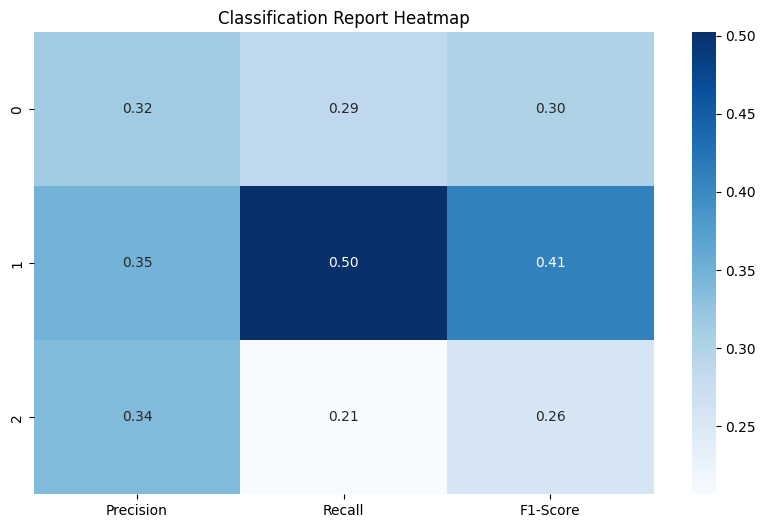

In [60]:
# Plotting a heatmap for precision, recall, and F1-score
class_report = classification_report(y_test, y_pred, output_dict=True)
class_names = [str(label) for label in class_report.keys() if label not in ['accuracy', 'macro avg', 'weighted avg']]

# Extract precision, recall, and F1-score for each class
heatmap_data = [[class_report[class_name]['precision'], class_report[class_name]['recall'], class_report[class_name]['f1-score']] for class_name in class_names]

# Create a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-Score'], yticklabels=class_names, cmap='Blues')
plt.title('Classification Report Heatmap')
plt.show()

In [62]:
# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters
svc=SVC()




In [63]:
# fit classifier to training set
svc.fit(X_train,y_train)





SVC()

In [64]:


# make predictions on test set
y_pred=svc.predict(X_test)

In [65]:
accuracy_svc=accuracy_score(y_test, y_pred)

In [66]:
from sklearn.metrics import accuracy_score

print('Model accuracy score of svc: ',accuracy_svc)

Model accuracy score of svc:  0.3393939393939394


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm_svc = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm_svc)

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

In [ ]:
# Plotting a heatmap for precision, recall, and F1-score
class_report = classification_report(y_test, y_pred, output_dict=True)
class_names = [str(label) for label in class_report.keys() if label not in ['accuracy', 'macro avg', 'weighted avg']]

# Extract precision, recall, and F1-score for each class
heatmap_data = [[class_report[class_name]['precision'], class_report[class_name]['recall'], class_report[class_name]['f1-score']] for class_name in class_names]

# Create a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-Score'], yticklabels=class_names, cmap='Blues')
plt.title('Classification Report Heatmap')
plt.show()

In [ ]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier# instantiate the DecisionTreeClassifier model with criterion gini index

dtc = DecisionTreeClassifier(criterion='gini', random_state=0)


In [ ]:
# fit the model
dtc.fit(X_train, y_train)

In [ ]:
y_pred = dtc.predict(X_test)

In [ ]:
accuracy_dtc = accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score DTC: ',accuracy_dtc)

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm_dtc = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm_dtc)

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dtc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


In [ ]:
# Plotting a heatmap for precision, recall, and F1-score
class_report = classification_report(y_test, y_pred, output_dict=True)
class_names = [str(label) for label in class_report.keys() if label not in ['accuracy', 'macro avg', 'weighted avg']]

# Extract precision, recall, and F1-score for each class
heatmap_data = [[class_report[class_name]['precision'], class_report[class_name]['recall'], class_report[class_name]['f1-score']] for class_name in class_names]

# Create a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-Score'], yticklabels=class_names, cmap='Blues')
plt.title('Classification Report Heatmap')
plt.show()